<a href="https://colab.research.google.com/github/woocashowski/CoronaVirus_Prediction/blob/master/Projekt_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza i predykcja zachorowań na COVID-19

## Opis choroby:
COVID-19 (od ang. Coronavirus Disease 2019) 
– ostra choroba zakaźna układu oddechowego wywołana zakażeniem wirusem SARS-CoV-2.

Zakażenie rozprzestrzenia się pomiędzy ludźmi drogą kropelkową, zazwyczaj w wyniku kaszlu lub kichania.

**Okres wylęgania się choroby najczęściej wynosi od 2 do 14 dni, ze średnią długością 5 dni.**

Osoby chore mogą zarażać na 24-48 godzin przed wystąpieniem objawów choroby.

### Czas trwania choroby

Przebieg choroby może być różnorodny. 

Większość pacjentów (ok. 81%) może przechodzić ją bezobjawowo lub mieć łagodne objawy, przypominające inne choroby górnych dróg oddechowych, które ustępują po około dwóch tygodniach. 

Część pacjentów może mieć ostrą (14%) lub krytyczną (5%) postać choroby, co wymaga 3 do 6 tygodni do wyleczenia. 

U pacjentów z postacią krytyczną, którzy zmarli, czas od wystąpienia objawów do śmierci wynosił od 2 do 8 tygodni[39].

## Importy

### Import bibliotek

In [0]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from astropy.table import QTable, Table, Column

# Machine Learning:
from sklearn.svm import SVR

### Import pliku

In [0]:
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['COVID-19-geographic-disbtribution-worldwide2.xlsx']))
#(r'COVID-19-geographic-disbtribution-worldwide.xlsx')
print (df)
# Source: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863

Saving COVID-19-geographic-disbtribution-worldwide2.xlsx to COVID-19-geographic-disbtribution-worldwide2.xlsx
         dateRep  day  month  ...  countryterritoryCode  popData2018  continentExp
0     2020-05-24   24      5  ...                   AFG   37172386.0          Asia
1     2020-05-23   23      5  ...                   AFG   37172386.0          Asia
2     2020-05-22   22      5  ...                   AFG   37172386.0          Asia
3     2020-05-21   21      5  ...                   AFG   37172386.0          Asia
4     2020-05-20   20      5  ...                   AFG   37172386.0          Asia
...          ...  ...    ...  ...                   ...          ...           ...
19032 2020-03-25   25      3  ...                   ZWE   14439018.0        Africa
19033 2020-03-24   24      3  ...                   ZWE   14439018.0        Africa
19034 2020-03-23   23      3  ...                   ZWE   14439018.0        Africa
19035 2020-03-22   22      3  ...                   ZWE   14

In [0]:
# Reading an excel file using Python 
import xlrd 
  
# Give the location of the file 
loc = ("COVID-19-geographic-disbtribution-worldwide2.xlsx") 
  
# To open Workbook 
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0) 
  
# For row 0 and column 0 - test
print(sheet.cell_value(1, 6)) 

Afghanistan


In [0]:
print(sheet.cell_value(1, 1)) 

24.0


## Lista krajów

In [0]:
countries = []
for i in range(sheet.nrows): 
    countries.append(sheet.cell_value(i, 6))  
    
output = []
for x in countries:
    if x not in output:
        output.append(x)
del(output[0])
countries = output
print(countries)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina', 'Botswana', 'Brazil', 'British_Virgin_Islands', 'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde', 'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands', 'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia', 'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland_Islands_(Malvinas)', 'Faroe_Islands', 'Fiji', 'Finland', '

## Suma zarażonych

Analiza krajów o największej ilości zarażonych pozwoli przyjrzeć się jedynie przypadkom istotnym. 

In [0]:
sum_cases = {}
for x in countries:
    sum_cases[x] = 0
#print(sum_cases.get(sheet.cell_value(0, 6)))


for i in range(sheet.nrows):
    if(i > 0):
        sum_cases[sheet.cell_value(i, 6)] = sheet.cell_value(i, 4) + sum_cases.get(sheet.cell_value(i, 6))

print(sum_cases)

{'Afghanistan': 9998.0, 'Albania': 989.0, 'Algeria': 8113.0, 'Andorra': 762.0, 'Angola': 60.0, 'Anguilla': 3.0, 'Antigua_and_Barbuda': 25.0, 'Argentina': 11340.0, 'Armenia': 6302.0, 'Aruba': 101.0, 'Australia': 7106.0, 'Austria': 16407.0, 'Azerbaijan': 3982.0, 'Bahamas': 100.0, 'Bahrain': 8802.0, 'Bangladesh': 32078.0, 'Barbados': 92.0, 'Belarus': 35244.0, 'Belgium': 56810.0, 'Belize': 18.0, 'Benin': 135.0, 'Bermuda': 133.0, 'Bhutan': 24.0, 'Bolivia': 5915.0, 'Bonaire, Saint Eustatius and Saba': 6.0, 'Bosnia_and_Herzegovina': 2391.0, 'Botswana': 30.0, 'Brazil': 347398.0, 'British_Virgin_Islands': 8.0, 'Brunei_Darussalam': 141.0, 'Bulgaria': 2408.0, 'Burkina_Faso': 814.0, 'Burundi': 42.0, 'Cambodia': 124.0, 'Cameroon': 4597.0, 'Canada': 83610.0, 'Cape_Verde': 371.0, 'Cases_on_an_international_conveyance_Japan': 696.0, 'Cayman_Islands': 129.0, 'Central_African_Republic': 552.0, 'Chad': 648.0, 'Chile': 65393.0, 'China': 84084.0, 'Colombia': 20177.0, 'Comoros': 78.0, 'Congo': 487.0, 'Costa

### Populacja

In [0]:
# Populacja:

pop = {}
for i in range(sheet.nrows):
    if(i > 0):
        pop[sheet.cell_value(i, 6)] = sheet.cell_value(i, 9)

#print(pop)


### Odsetek osób zarażonych

In [0]:
# Odsetek osób zarażonych:
per = {}

for x in countries:
    if(pop[x] == '' or pop[x] == 0 ):
        print(x, "- brak danych, element zostaje usunięty z danych")
        del(pop[x])
        countries.remove(x)
        # ^jeżeli państwo ma 0 populacji lub brak danych to ustalamy liczbę przypadków jako 0, by uniknąć problemów
        # + to państwo najwidoczniej nie jest istotne
    else:
        per[x] = (sum_cases[x]/float(pop[x]))
        #print(x, sum_cases[x] / pop[x])

#print(per)

Anguilla - brak danych, element zostaje usunięty z danych
Bonaire, Saint Eustatius and Saba - brak danych, element zostaje usunięty z danych
Eritrea - brak danych, element zostaje usunięty z danych
Falkland_Islands_(Malvinas) - brak danych, element zostaje usunięty z danych
Western_Sahara - brak danych, element zostaje usunięty z danych


## Predykcja z wykorzystaniem modelu SVR

### Funkcja predykcyjna

In [0]:
# Funkcja do predykcji używająca 3 różnych modelów SVR z 3 różnymi kernelami
def predict_cases(dates, cases, x, variable_C):
  # Stworzenie 3 modeli SVR
  svr_lin = SVR(kernel='linear', C=variable_C)
  svr_poly = SVR(kernel='poly', C=variable_C , degree=6)
  svr_rbf = SVR(kernel='rbf', C=variable_C , gamma=1.1) # Radial basis function

  # Wytrenowanie modelu
  svr_lin.fit(dates, cases)
  svr_poly.fit(dates, cases)
  svr_rbf.fit(dates, cases)

  # Czy mam narysować wykres?
  graph = False
  if(graph):
  # Tworzenie wykresu by zobaczyć co jest najlepiej dopasowane
    plt.scatter(dates, svr_lin.predict(dates), color='blue', label="Linear Model")
    plt.scatter(dates, svr_poly.predict(dates), color='green', label="Polynomial Model")
    plt.scatter(dates, svr_rbf.predict(dates), s=20, color='red', label="RBF Model")
    plt.scatter(dates, cases, s=3, color='black', label="Data")
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.title('Suppor Vector Regression (SVR)')
    plt.legend()
    plt.show()

  # Zwrócenie wartości predykcyjnych
  return int(svr_lin.predict(x)[0]), int(svr_poly.predict(x)[0]), int(svr_rbf.predict(x)[0])

### Podział na zbiór treningowy i testowy 

In [0]:
def create_dataset(country, start_case, ratio, sum_or_daily):
  # country - nazwa kraju
  # start_case - od ilu dziennych zarażeń chcemy liczyć
  # ratio - stosunek treningowy/testowy
  # sum_or_daily - suma zarażeń czy ilość zarażeń dziennych?

  # % testowych przypadków
  #ratio = 0.9

  # pierwszy dzień zakażeń:
  n_day = 1

  # przypadki do trenowania
  cases_train = [] 
  dates_train = []

  # przypadki do testowania
  cases_test = [] 
  dates_test = []

  # wszystkie przypadki
  cases = []
  dates = []

  for i in range(sheet.nrows):
    if(sheet.cell_value(i, 6) == country):
      cases.append(sheet.cell_value(i, 4))
      dates.append(n_day)
      n_day += 1

  # Aby uniknąć błędów z powodu dużej ilości wartości 0 pozbędziemy się dni
  # przed dziennym zachorowaniem w liczbie n_people -
  # - jest różnica między np dużymi USA i małą Polską 
  tmp_dates = []
  tmp_cases = []

  # jeżeli był przypadek o liczbie start_case to idziemy dalej
  wasFirst = False 
  for data in list(reversed(dates)):
    if(cases[data-1] >= start_case or wasFirst):
      tmp_dates.append([data])
      tmp_cases.append(cases[data-1])
      wasFirst = True # jeśli się wykonało raz, to niech wykonuje się do końca

  # odwrócenie dat, ponieważ są odwrócone w kolejności przez poprzednią funkcję
  dates = list(reversed(tmp_dates))
  cases = (tmp_cases)


  
  for n in range(0, len(cases)):
    if(n > 0):
      if(sum_or_daily):
        cases[n] = cases[n] + cases[n-1]
        #print("ok: ",cases[n], n, len(cases))
  # Czy chcemy liczyć dla wartości dziennych czy sumując przypadki
  #if(sum_or_daily):
  #  for n in range(0, len(cases)):
  #    if(n > 0):
  #      cases[n] = cases[n] #+ cases[n-1]
  #      #print("ok: ",cases[n], n, len(cases))
  else:
    for n in range(0, len(cases)):
      if(n > 0):
        cases[n] = cases[n]
        #print("ok",cases[n], n, len(cases))



  # 2 opcje:
  # False - po staremu tzn 1 dzień do przodu
  # True  - kilka dni do przodu na datasecie
  # opt = False - opcja standardowa by pokazywało 1 dzień do przodu

  # Podział według ratio
  #if(opt):
  # przypadki
  cases_train = cases[:int(len(cases)*ratio)]
  cases_test = cases[int(len(cases)*ratio):]

  # daty
  dates_train = dates[:int(len(dates)*ratio)] 
  dates_test = dates[int(len(dates)*ratio):]

  # Przekazanie całego zbioru
  #else:
    # przypadki
  #  cases_train = cases[:int(len(cases))]
  #  cases_test = cases[int(len(cases)):]

    # daty
    #dates_train = dates[:int(len(dates))]
    #dates_test = dates[int(len(dates)):]

  return cases_train, dates_train, cases_test, dates_test

# test
#create_dataset("Poland", 4, False, 0.9)[3]

#### Testy podziału


In [0]:
# testy predykcji
country = "Poland"
cpd = 4
#
#predicted_cases = predict_cases(create_dataset(country, cpd)[1], create_dataset(country, cpd)[0],  [[79]]) #create_dataset(country, cpd)[3] lub [[79]]
#print(predicted_cases)

### Znalezienie wartości C

In [0]:
def find_C(country, start_case, ratio, sum_or_daily):
  new_data = create_dataset(country, start_case, ratio, sum_or_daily)
  best_value = predict_cases(new_data[1], new_data[0], [new_data[3][0]], 1)
  best_c = 1
  print(new_data[2])
  print("Value for C =", best_c, best_value)
  
  for i in [5, 10, 25, 50, 75, 100, 250, 500]: #, 625, 750, 875, 1000
    tmp_value = predict_cases(new_data[1], new_data[0], [new_data[3][0]], i)
    print("Value for C =", i, tmp_value)
    if( abs(tmp_value[0]-new_data[2][0]) + abs(tmp_value[1]-new_data[2][0]) + abs(tmp_value[2]-new_data[2][0]) < 
       ( abs(best_value[0]-new_data[2][0]) + abs(best_value[1]-new_data[2][0]) + abs(best_value[2]-new_data[2][0]) ) ):
      best_value = tmp_value
      best_c = i
      print("New best value")
  print("The best C value is", best_c)


  return abs(best_c)

#find_C("Poland", 4, 0.95, False)

  

### Obliczenie wartości dla konkretnego dnia

In [0]:

#predicted_cases[2]
# Liczymy na x dni do przodu

def calculate_value(country, start_case, case_day, ratio, sum_or_daily, variable_C):
    predicted_cases = predict_cases(create_dataset(country, start_case, ratio, sum_or_daily)[1], create_dataset(country, start_case, ratio, sum_or_daily)[0], case_day, variable_C)
    return predicted_cases


calculate_value("Poland", 4, [[79]], 0.7, False, 100)

(649, 2887, 223)

### Przewidywanie na kilka dni

In [0]:
def predicting_few_days(country, start_case, ratio, sum_or_daily, variable_C):
  # country - kraj
  # start_case - od ilu dni liczyć
  # ratio - stosunek treningu do testu
  # liczymy według sumy? Jeśli nie to dziennie

  # wybierzmy kraj
  new_dataset = create_dataset(country, start_case, ratio, sum_or_daily)

  # Przewidywane wartości:
  I_have_predidicted_values_data    = []
  I_have_predidicted_values_linear  = []
  I_have_predidicted_values_poly    = []
  I_have_predidicted_values_svr     = []
  I_have_real_values = new_dataset[2]

  i = 0
  # Wyliczmy wartości:
  for data in new_dataset[3]:
    I_have_predidicted_values_data.append(data[0])
    I_have_predidicted_values_linear.append(calculate_value(country, start_case, [data], ratio, sum_or_daily, variable_C)[0])
    I_have_predidicted_values_poly.append(  calculate_value(country, start_case, [data], ratio, sum_or_daily, variable_C)[1]) 
    I_have_predidicted_values_svr.append(   calculate_value(country, start_case, [data], ratio, sum_or_daily, variable_C)[2])
    #I_have_predidicted_values.append(calculate_value(country, start_case, [data]))
    #print(calculate_value(country, start_case, [data])[1]/ int(new_dataset[2][i]) )
    i = i + 1

  return I_have_predidicted_values_data, I_have_predidicted_values_linear, I_have_predidicted_values_poly, I_have_predidicted_values_svr, I_have_real_values
  #return  new_dataset[3], I_have_predidicted_values #new_dataset,
  
print((predicting_few_days("Poland", 4, 0.9, True, 100)[1]), "\n", (predicting_few_days("Poland", 4, 0.9, True, 100)[4]))

# few days <3 :
# https://www.youtube.com/watch?v=QMnQF7hjsbI

[17846, 18162, 18478, 18794, 19110, 19426, 19742, 20059] 
 [18256.0, 18528.0, 18884.0, 19267.0, 19738.0, 20142.0, 20618.0, 20930.0]


### Tworzenie wykresu dla dowolnego kraju



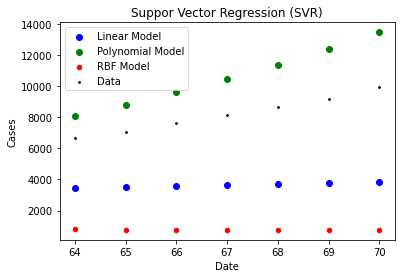

In [0]:
# Wykres
def draw_graph(country = "Poland", start_case = 4, ratio = 0.9, sum_or_daily = True, variable_C = 100):
  values_predicted = predicting_few_days(country, start_case, ratio, sum_or_daily, variable_C)
  dates = values_predicted[0]
  #print(values_predicted)


  # Tworzenie wykresu by zobaczyć co jest najlepiej dopasowane
  #print(values_predicted[0], "xd", predicting_few_days[1][0])
  plt.scatter(dates, values_predicted[1], color='blue', label="Linear Model")
  plt.scatter(dates, values_predicted[2], color='green', label="Polynomial Model")
  plt.scatter(dates, values_predicted[3], s=20, color='red', label="RBF Model")
  plt.scatter(dates, values_predicted[4], s=3, color='black', label="Data")
  plt.xlabel('Date')
  plt.ylabel('Cases')
  plt.title('Suppor Vector Regression (SVR)')
  plt.legend()
  plt.show()
#draw_graph("United_States_of_America")
#draw_graph("Poland")
draw_graph("Afghanistan")

#### Testy wykresów

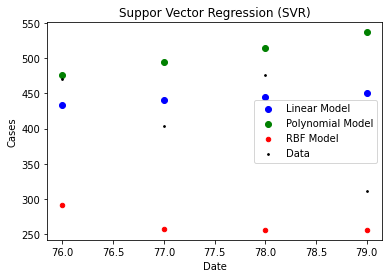

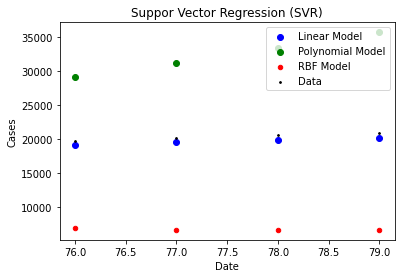

In [0]:
draw_graph("Poland", 4, 0.95, False, 875)
draw_graph("Poland", 4, 0.95, True, 875)

In [0]:
#draw_graph("Poland", 4, 0.7, False, 875)
#draw_graph("Poland", 4, 0.7, True, 875)

### Tabela danych

In [0]:
# Tabela
def make_table(country = "Poland", start_case = 4, ratio = 0.95, sum_or_daily = False, variable_C = 875):
  values_predicted = predicting_few_days(country, start_case, ratio, sum_or_daily, variable_C)
  real = values_predicted[1]
  print("Cases: \n")
  print(Table([values_predicted[0], values_predicted[4], values_predicted[1], 
               values_predicted[2], values_predicted[3]], names = ["date", "real", "linear", "poly", "rbf"]))
#make_table("Poland", 4, 0.7, False, 875)
print("\n\n\n")
#make_table("Poland", 4, 0.7, True, 875)

### Predykcje dla wybranych krajów 

In [0]:
#Polska
make_table("Poland", 4, 0.95, False, 875)
make_table("Poland", 4, 0.95, True, 875)

Cases: 

date  real linear poly rbf
---- ----- ------ ---- ---
  76 471.0    434  476 292
  77 404.0    440  495 257
  78 476.0    445  515 256
  79 312.0    450  537 256
Cases: 

date   real  linear  poly rbf 
---- ------- ------ ----- ----
  76 19738.0  19171 29142 6900
  77 20142.0  19489 31195 6609
  78 20618.0  19806 33385 6598
  79 20930.0  20124 35721 6598


#### Chiny

In [0]:
print("Wartość dzienna:")
find_C("China", 10, 0.7, False)

print("\n\n")

print("Wartość sumaryczna:")
find_C("China", 10, 0.7, True)

Wartość dzienna:
[79.0, 93.0, 112.0, 94.0, 49.0, 50.0, 352.0, 31.0, 18.0, 14.0, 32.0, 15.0, 12.0, 8.0, 15.0, 10.0, 3.0, 26.0, 2.0, 4.0, 12.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 6.0, 0.0, 15.0, 19.0, 1.0, 7.0, 6.0, 5.0, 9.0, 6.0, 10.0, 9.0, 2.0, 2.0, 12.0, 2.0, 3.0]
Value for C = 1 (84, 19, 100)
Value for C = 5 (84, 21, 101)
New best value
Value for C = 10 (84, 23, 101)
New best value
Value for C = 25 (84, 22, 98)
New best value
Value for C = 50 (84, 23, 101)
Value for C = 75 (84, 23, 108)
Value for C = 100 (84, 12, 123)
Value for C = 250 (84, 3, 195)
Value for C = 500 (84, -59, 288)
Value for C = 625 (84, -70, 331)
Value for C = 750 (84, -94, 369)
Value for C = 875 (84, -105, 405)
Value for C = 1000 (84, -116, 427)
The best C value is 25



Wartość sumaryczna:
[83004.0, 83097.0, 83209.0, 83303.0, 83352.0, 83402.0, 83754.0, 83785.0, 83803.0, 83817.0, 83849.0, 83864.0, 83876.0, 83884.0, 83899.0, 83909.0, 83912.0, 83938.0, 83940.0, 83944.0, 83956.0, 83959.0, 83961.0, 83964.0, 83966.0, 83968.0,

1

Wartość dzienna:
Cases: 

date  real linear poly rbf
---- ----- ------ ---- ---
 103  79.0     84   22  98
 104  93.0     83   14 107
 105 112.0     83    6 107
 106  94.0     82   -1 107
 107  49.0     81  -10 107
 108  50.0     81  -19 107
 109 352.0     80  -29 107
 110  31.0     79  -39 107
 111  18.0     78  -50 107
 112  14.0     78  -61 107
 ...   ...    ...  ... ...
 136   6.0     61 -530 107
 137   5.0     60 -560 107
 138   9.0     60 -592 107
 139   6.0     59 -625 107
 140  10.0     58 -659 107
 141   9.0     58 -695 107
 142   2.0     57 -731 107
 143   2.0     56 -769 107
 144  12.0     56 -809 107
 145   2.0     55 -849 107
 146   3.0     54 -891 107
Length = 44 rows





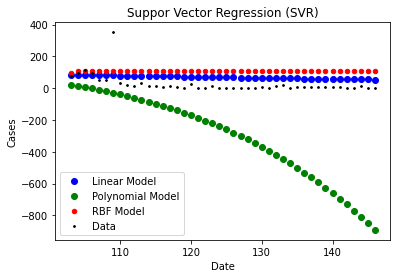





Wartość sumaryczna:
Cases: 

date   real  linear  poly   rbf 
---- ------- ------ ------ -----
 103 83004.0  95281 118188 74455
 104 83097.0  96234 122863 74455
 105 83209.0  97186 127770 74455
 106 83303.0  98139 132915 74455
 107 83352.0  99091 138309 74455
 108 83402.0 100044 143961 74455
 109 83754.0 100997 149881 74455
 110 83785.0 101949 156078 74455
 111 83803.0 102902 162564 74455
 112 83817.0 103854 169349 74455
 ...     ...    ...    ...   ...
 136 84024.0 126715 454997 74455
 137 84029.0 127668 473652 74455
 138 84038.0 128620 493001 74455
 139 84044.0 129573 513064 74455
 140 84054.0 130526 533862 74455
 141 84063.0 131478 555416 74455
 142 84065.0 132431 577747 74455
 143 84067.0 133383 600880 74455
 144 84079.0 134336 624835 74455
 145 84081.0 135288 649637 74455
 146 84084.0 136241 675308 74455
Length = 44 rows



Cases: 

date   real  linear  poly   rbf 
---- ------- ------ ------ -----
 103 83004.0  95281 118188 74455
 104 83097.0  96234 122863 74455
 105 83209.0  

In [0]:
print("Wartość dzienna:")
make_table("China", 4, 0.7, False, 25)
print("\n\n")
draw_graph("China", 4, 0.7, False, 25)

print("\n\n\n")

print("Wartość sumaryczna:")
make_table("China", 4, 0.7, True, 1)
print("\n\n")
make_table("China", 4, 0.7, True, 1)


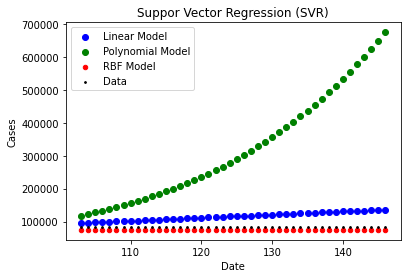

In [0]:
draw_graph("China", 4, 0.7, True, 1)

#### Stany Zjednoczone

In [0]:
print("Wartość dzienna:")
find_C("United_States_of_America", 100, 0.7, False)

print("\n\n")

print("Wartość sumaryczna:")
find_C("United_States_of_America", 100, 0.7, True)

Wartość dzienna:
[29917.0, 33955.0, 29288.0, 24972.0, 22593.0, 23841.0, 24128.0, 28369.0, 26957.0, 25612.0, 20258.0, 18117.0, 22048.0, 20782.0, 27143.0, 25508.0, 24487.0, 18873.0, 21841.0, 19970.0, 23285.0, 25434.0, 24147.0, 21236.0]
Value for C = 1 (29042, 31661, 22540)
Value for C = 5 (38330, 31660, 22539)
Value for C = 10 (40814, 31660, 22537)
Value for C = 25 (41190, 31658, 22532)
Value for C = 50 (42136, 31655, 22523)
Value for C = 75 (42136, 31652, 22515)
Value for C = 100 (42136, 31649, 22506)
Value for C = 250 (42136, 31631, 22454)
Value for C = 500 (42136, 31601, 22368)
Value for C = 625 (42136, 31586, 22380)
Value for C = 750 (42136, 31571, 22443)
Value for C = 875 (42136, 31556, 22505)
Value for C = 1000 (42136, 31541, 22568)
The best C value is 1



Wartość sumaryczna:
[1069593.0, 1103548.0, 1132836.0, 1157808.0, 1180401.0, 1204242.0, 1228370.0, 1256739.0, 1283696.0, 1309308.0, 1329566.0, 1347683.0, 1369731.0, 1390513.0, 1417656.0, 1443164.0, 1467651.0, 1486524.0, 1508365.0

1000

Wartość dzienna:
Cases: 

date   real  linear  poly   rbf 
---- ------- ------ ------ -----
  56 29917.0  42136  31541 22568
  57 33955.0  42942  33027 22235
  58 29288.0  43749  34649 22223
  59 24972.0  44555  36418 22222
  60 22593.0  45362  38343 22222
  61 23841.0  46168  40435 22222
  62 24128.0  46975  42706 22222
  63 28369.0  47781  45168 22222
  64 26957.0  48588  47832 22222
  65 25612.0  49394  50714 22222
 ...     ...    ...    ...   ...
  69 20782.0  52620  64692 22222
  70 27143.0  53426  68877 22222
  71 25508.0  54233  73372 22222
  72 24487.0  55039  78196 22222
  73 18873.0  55846  83365 22222
  74 21841.0  56652  88902 22222
  75 19970.0  57459  94825 22222
  76 23285.0  58265 101157 22222
  77 25434.0  59072 107919 22222
  78 24147.0  59878 115135 22222
  79 21236.0  60685 122829 22222
Length = 24 rows





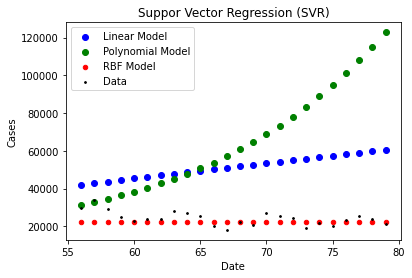





Wartość sumaryczna:
Cases: 

date    real   linear   poly    rbf  
---- --------- ------ -------- ------
  56 1069593.0 266475  1557009 245307
  57 1103548.0 267231  1718291 245307
  58 1132836.0 267987  1894358 245307
  59 1157808.0 268743  2086276 245307
  60 1180401.0 269499  2295166 245307
  61 1204242.0 270255  2522208 245307
  62 1228370.0 271011  2768643 245307
  63 1256739.0 271767  3035774 245307
  64 1283696.0 272523  3324967 245307
  65 1309308.0 273279  3637659 245307
 ...       ...    ...      ...    ...
  69 1390513.0 276303  5154545 245307
  70 1417656.0 277059  5608727 245307
  71 1443164.0 277815  6096535 245307
  72 1467651.0 278571  6619933 245307
  73 1486524.0 279327  7180967 245307
  74 1508365.0 280083  7781773 245307
  75 1528335.0 280839  8424575 245307
  76 1551620.0 281595  9111689 245307
  77 1577054.0 282351  9845527 245307
  78 1601201.0 283107 10628594 245307
  79 1622437.0 283863 11463501 245307
Length = 24 rows





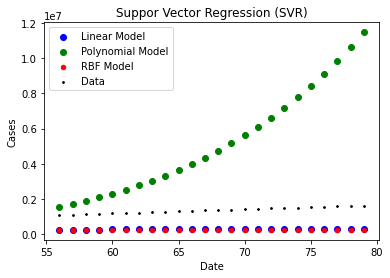

In [0]:
print("Wartość dzienna:")
make_table("United_States_of_America", 100, 0.7, False, 1000)
print("\n\n")
draw_graph("United_States_of_America", 100, 0.7, False, 1000)

print("\n\n\n")

print("Wartość sumaryczna:")
make_table("United_States_of_America", 100, 0.7, True, 1)
print("\n\n")
draw_graph("United_States_of_America", 100, 0.7, True, 1)

#### Czechy

In [0]:
country = "Czechia"

print("Wartość dzienna:")
find_C(country, 4, 0.7, False)

print("\n\n")

print("Wartość sumaryczna:")
find_C(country, 4, 0.7, True)

Wartość dzienna:
[103.0, 55.0, 18.0, 26.0, 38.0, 77.0, 78.0, 57.0, 46.0, 18.0, 28.0, 53.0, 45.0, 48.0, 82.0, 55.0, 49.0, 20.0, 111.0, 61.0, 74.0, 33.0, 59.0, 77.0]
Value for C = 1 (138, 23, 108)
Value for C = 5 (138, 23, 104)
New best value
Value for C = 10 (138, 23, 101)
Value for C = 25 (138, 24, 100)
Value for C = 50 (138, 27, 105)
New best value
Value for C = 75 (138, 30, 108)
Value for C = 100 (138, 33, 112)
Value for C = 250 (138, 34, 118)
Value for C = 500 (138, 44, 119)
New best value
Value for C = 625 (138, 57, 119)
New best value
Value for C = 750 (138, 90, 119)
New best value
Value for C = 875 (138, 117, 119)
Value for C = 1000 (138, 126, 119)
The best C value is 750



Wartość sumaryczna:
[7674.0, 7729.0, 7747.0, 7773.0, 7811.0, 7888.0, 7966.0, 8023.0, 8069.0, 8087.0, 8115.0, 8168.0, 8213.0, 8261.0, 8343.0, 8398.0, 8447.0, 8467.0, 8578.0, 8639.0, 8713.0, 8746.0, 8805.0, 8882.0]
Value for C = 1 (8324, 12044, 3715)
Value for C = 5 (8590, 12044, 3717)
Value for C = 10 (8590, 1

1

Wartość dzienna:
Cases: 

date  real linear  poly rbf
---- ----- ------ ----- ---
  47  38.0     38   -71 121
  48  77.0     33  -103 155
  49  78.0     29  -140 156
  50  57.0     24  -180 156
  51  46.0     19  -225 156
  52  18.0     15  -274 156
  53  28.0     10  -328 156
  54  53.0      5  -387 156
  55  45.0      0  -452 156
  56  48.0     -3  -524 156
  57  82.0     -8  -602 156
  58  55.0    -13  -687 156
  59  49.0    -17  -779 156
  60  20.0    -22  -881 156
  61 111.0    -27  -990 156
  62  61.0    -32 -1109 156
  63  74.0    -36 -1239 156
  64  33.0    -41 -1379 156
  65  59.0    -46 -1530 156
  66  77.0    -50 -1693 156





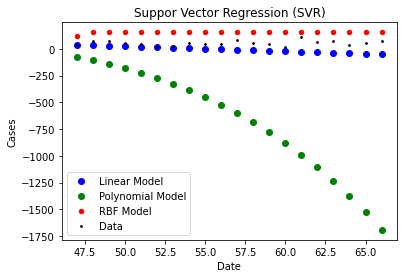





Wartość sumaryczna:
Cases: 

date  real  linear  poly rbf 
---- ------ ------ ----- ----
  47 7297.0   8197  9736 5295
  48 7374.0   8348 10472 5295
  49 7452.0   8500 11288 5295
  50 7509.0   8652 12191 5295
  51 7555.0   8804 13190 5295
  52 7573.0   8956 14291 5295
  53 7601.0   9108 15504 5295
  54 7654.0   9260 16837 5295
  55 7699.0   9412 18298 5295
  56 7747.0   9564 19899 5295
  57 7829.0   9716 21650 5295
  58 7884.0   9867 23561 5295
  59 7933.0  10019 25644 5295
  60 7953.0  10171 27911 5295
  61 8064.0  10323 30375 5295
  62 8125.0  10475 33050 5295
  63 8199.0  10627 35949 5295
  64 8232.0  10779 39088 5295
  65 8291.0  10931 42482 5295
  66 8368.0  11083 46147 5295





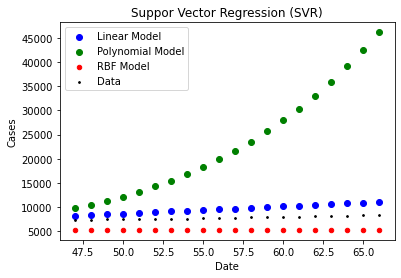

In [0]:
country = "Czechia"
c1 = 750
c2 = 1

print("Wartość dzienna:")
make_table(country, 100, 0.7, False, c1)
print("\n\n")
draw_graph(country, 100, 0.7, False, c1)

print("\n\n\n")

print("Wartość sumaryczna:")
make_table(country, 100, 0.7, True, c2)
print("\n\n")
draw_graph(country, 100, 0.7, True, c2)

#### Afganistan

In [0]:
country = "Afghanistan"

print("Wartość dzienna:")
find_C(country, 4, 0.7, False)

print("\n\n")

print("Wartość sumaryczna:")
find_C(country, 4, 0.7, True)

Wartość dzienna:
[235.0, 190.0, 330.0, 168.0, 171.0, 215.0, 255.0, 369.0, 285.0, 280.0, 259.0, 113.0, 1063.0, 0.0, 262.0, 408.0, 581.0, 492.0, 531.0, 540.0, 782.0]
Value for C = 1 (107, 204, 35)
Value for C = 5 (107, 204, 38)
New best value
Value for C = 10 (107, 203, 42)
New best value
Value for C = 25 (107, 206, 48)
New best value
Value for C = 50 (107, 216, 62)
New best value
Value for C = 75 (107, 222, 69)
New best value
Value for C = 100 (107, 228, 70)
New best value
Value for C = 250 (107, 264, 73)
Value for C = 500 (107, 324, 73)
Value for C = 625 (107, 346, 73)
Value for C = 750 (107, 254, 73)
Value for C = 875 (107, 232, 73)
New best value
Value for C = 1000 (107, 234, 73)
New best value
The best C value is 1000



Wartość sumaryczna:
[2694.0, 2884.0, 3214.0, 3382.0, 3553.0, 3768.0, 4023.0, 4392.0, 4677.0, 4957.0, 5216.0, 5329.0, 6392.0, 6392.0, 6654.0, 7062.0, 7643.0, 8135.0, 8666.0, 9206.0, 9988.0]
Value for C = 1 (1518, 3229, 413)
Value for C = 5 (1536, 3231, 414)
New best 

1000

Wartość dzienna:
Cases: 

date  real  linear poly rbf
---- ------ ------ ---- ---
  22  113.0    300  364 205
  23 1063.0    311  427 188
  24    0.0    322  506 187
  25  262.0    332  604 187
  26  408.0    343  723 187
  27  581.0    353  868 187
  28  492.0    364 1041 187
  29  531.0    374 1249 187
  30  540.0    385 1496 187
  31  782.0    395 1787 187





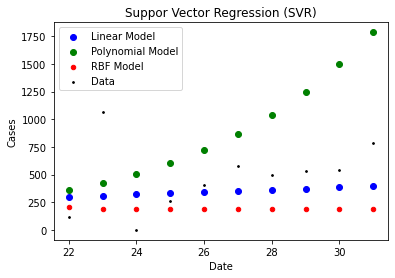





Wartość sumaryczna:
Cases: 

date  real  linear  poly rbf 
---- ------ ------ ----- ----
  22 4163.0   3844  6956 1606
  23 5226.0   4043  8737 1522
  24 5226.0   4243 10949 1519
  25 5488.0   4442 13674 1519
  26 5896.0   4642 17002 1519
  27 6477.0   4842 21035 1519
  28 6969.0   5041 25889 1519
  29 7500.0   5241 31690 1519
  30 8040.0   5440 38584 1519
  31 8822.0   5640 46727 1519





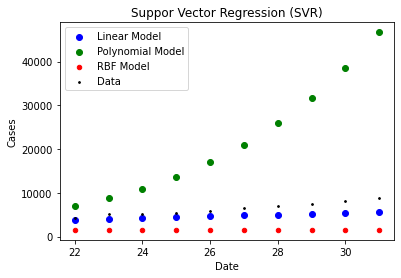

In [0]:
country = "Afghanistan"
c1 = 100
c2 = 250

print("Wartość dzienna:")
make_table(country, 100, 0.7, False, c1)
print("\n\n")
draw_graph(country, 100, 0.7, False, c1)

print("\n\n\n")

print("Wartość sumaryczna:")
make_table(country, 100, 0.7, True, c2)
print("\n\n")
draw_graph(country, 100, 0.7, True, c2)